<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [1]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import scipy.stats as scs 

import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels.api as sm
from statsmodels.formula.api import ols

# importera palmer penguins
filepath = 'dataset/penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna().reset_index() # Plocka bort rader som innehåller NaN

In [2]:
penguins = penguins.sample(30)
penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
25,30,Adelie,Dream,39.5,16.7,178.0,3250.0,female,2007
117,123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,male,2009
222,230,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,female,2008
254,263,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,male,2009
80,86,Adelie,Dream,36.3,19.5,190.0,3800.0,male,2008


<h3>Korrelationstest med scipy.stats</h3>

In [3]:
r, p = scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
r, p

(0.923679569194055, 3.4780328659158733e-13)

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [4]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           3.48e-13
Time:                        09:41:46   Log-Likelihood:                -94.747
No. Observations:                  30   AIC:                             193.5
Df Residuals:                      28   BIC:                             196.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     126.3504      6.074     20.803      

<h3>Prediktionsintervall in sample-prediktion</h3>

In [5]:
predictions = model.get_prediction(penguins['body_mass_g'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,171.154474,196.428853
1,182.503970,207.172156
2,197.969883,222.636163
3,218.392200,244.632021
4,181.155076,205.869914
5,180.704640,205.436638
6,203.157893,228.052697
7,200.138544,224.886062
8,176.632789,201.555082
9,202.297203,227.145963


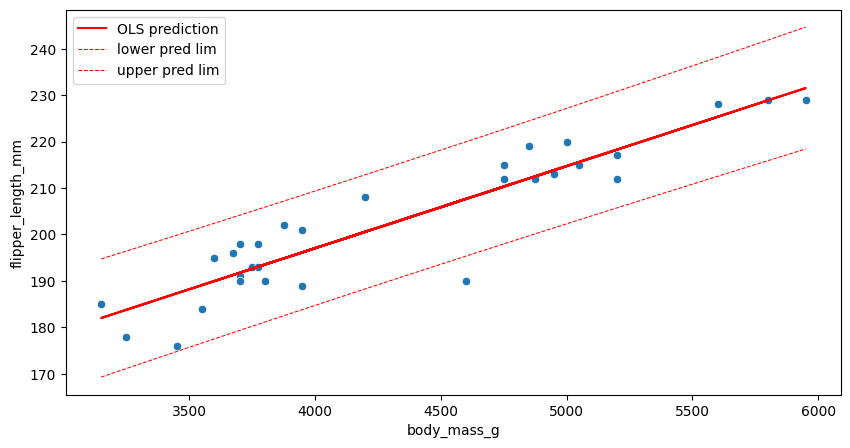

In [6]:
order = np.argsort(penguins['body_mass_g'])
xs = np.array(penguins['body_mass_g'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

order = np.argsort(penguins['body_mass_g'])
x = np.array(penguins['body_mass_g'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

      body_mass_g
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


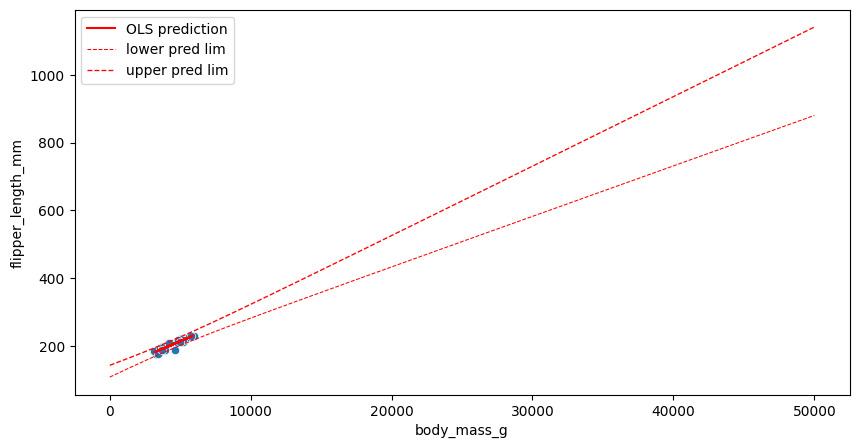

In [7]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['body_mass_g'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r-.', label="lower prediction limit", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper prediction limit", linewidth=0.95)

ax.legend(loc="best")
plt.show()